In [444]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

words = open('artist_names.txt', 'r').read().splitlines()

# Create the dataset
chars = sorted(list(set(''.join(words)))) 
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['*'] = 0
itos = {i:s for s,i in stoi.items()}

print(itos)
no_of_chs = len(itos)
context_length = 10 # how many previous characters are taken into account before predicting the next one
emb_per_ch = 100 # number of embedding dimensions per character (numbers representing a characters semantic meaning)
hidden_layer_neurons = 500 # number of neurons in the hidden layer

def build_dataset(words):

    X, Y = [], []
    for w in words:
        chs = ['*'] + list(w) + ['*']
        context = [0] * context_length
        for ch in w + '*':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    n = len(X)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
# Dataset splits
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])
# Parameters
C = torch.randn(no_of_chs, emb_per_ch) # each possible character has emb_per_ch embeddings
W1 = torch.randn(emb_per_ch * context_length, hidden_layer_neurons) # hidden layer weights, 
b1 = torch.randn(hidden_layer_neurons) # hidden layer biases
W2 = torch.randn(hidden_layer_neurons, no_of_chs) # output layer weights
b2 = torch.randn(no_of_chs) # output layer biases

parameters = [W1, b1, W2, b2, C]
for p in parameters:
    p.requires_grad = True

{1: ' ', 2: '!', 3: '"', 4: '#', 5: '$', 6: '%', 7: '&', 8: "'", 9: '(', 10: ')', 11: '+', 12: ',', 13: '-', 14: '.', 15: '/', 16: '0', 17: '1', 18: '2', 19: '3', 20: '4', 21: '5', 22: '6', 23: '7', 24: '8', 25: '9', 26: ':', 27: ';', 28: '<', 29: '=', 30: '>', 31: '?', 32: '@', 33: '[', 34: ']', 35: '^', 36: '_', 37: 'a', 38: 'b', 39: 'c', 40: 'd', 41: 'e', 42: 'f', 43: 'g', 44: 'h', 45: 'i', 46: 'j', 47: 'k', 48: 'l', 49: 'm', 50: 'n', 51: 'o', 52: 'p', 53: 'q', 54: 'r', 55: 's', 56: 't', 57: 'u', 58: 'v', 59: 'w', 60: 'x', 61: 'y', 62: 'z', 63: '|', 64: '~', 0: '*'}


In [440]:
no_of_params = sum(p.nelement() for p in parameters) # run this to check the number of parameters in the model 
no_of_params

519732

In [445]:
# Training

stepi = []
lossi = []
batch_size = 50
iterations = 100000
learning_rate = 0.1

for i in range(iterations):
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    n = len(ix)
    emb = C[Xtr[ix]]
    # print(emb.shape)
    concat = emb.view(n, emb_per_ch * context_length)
    h = torch.tanh(concat @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    lossi.append(loss.item())
    stepi.append(i)

    if i % 10000 == 0:
        print(f"Completed {i} iterations")
    
    # Entire backward pass:
    for p in parameters:
        p.grad = None
    
    loss.backward()

    lr = learning_rate if i < (iterations / 2) else (learning_rate / 10)
    
    for p in parameters:
        p.data += -lr * p.grad
        
print(lossi[-1])
print(loss.item())

Completed 0 iterations
Completed 10000 iterations
Completed 20000 iterations
Completed 30000 iterations
Completed 40000 iterations
Completed 50000 iterations
Completed 60000 iterations
Completed 70000 iterations
Completed 80000 iterations
Completed 90000 iterations
2.7103021144866943
2.7103021144866943


In [442]:
# Tracks the model loss for the dev dataset, so how well our model performs on unseen data
emb = C[Xdev]
n = Xdev.shape[0]
# print(emb.shape)
concat = emb.view(n, emb_per_ch * context_length)
h = torch.tanh(concat @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.5546250343322754


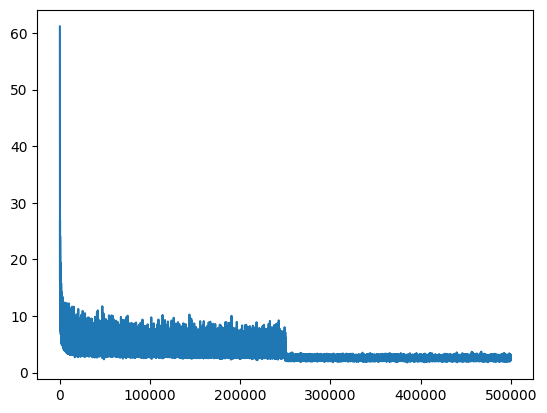

In [433]:
plt.plot(stepi, lossi)

In [446]:
# Sampling from the MLP model:
# g = torch.Generator().manual_seed(12)
j = 0
for _ in range (20):
    out = []
    context = [0] * context_length
    while True:
        emb = C[torch.tensor([context])]
        concat = emb.view(1, emb_per_ch * context_length)
        h = torch.tanh(concat @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    current_name = ''.join(itos[i] for i in out[:-1])
    # if current_name not in words:
    #     print(current_name.capitalize())
        
    print(current_name.capitalize())
    

#     if current_name in words:
#         j += 1
# print(j/2000 * 100)

Britp.en
Jhili
Paase mlish
Togla
Anmi dner
A magt e oa
Ertay
Bllin chqrsyy
Steums &oor calo boztigh radestoredor
Raringeg
Dyril deume
Ki roth dhifesroy
Tis hecor
Sthemia
Tire bosl
Feajilsoh
Kamcclh yedter
Atre skel
Dlye fllall
Mesilk cora


In [408]:
# Print the current settings

print(f"Number of training examples: {len(Ytr)}")
print(f"Number of context characters: {context_length}")
print(f"Number of input embedding dimensions: {emb_per_ch}")
print(f"Number of neurons in the hidden layer: {hidden_layer_neurons}")
print(f"Number of characters in training batch: {batch_size}")
print(f"Number of training iterations: {iterations}")
print(f"Total parameters: {no_of_params}")
print(f"Learning rate: {learning_rate} for first {int(iterations / 2)} iterations, then {learning_rate / 10} for remaining {int(iterations / 2)} iterations")

Number of training examples: 915912
Number of context characters: 10
Number of input embedding dimensions: 10
Number of neurons in the hidden layer: 200
Number of characters in training batch: 100
Number of training iterations: 200000
Total parameters: 33915
Learning rate: 0.1 for first 100000 iterations, then 0.01 for remaining 100000 iterations
